In [1]:
import numpy as np
import pandas as pd
import random

def generate_synthetic_tape(n_trades=120, sup_range=(100, 200), dem_range=(50, 150)):

    prices = []
    for i in range(n_trades):

        price = random.randint(
            max(dem_range[0], sup_range[0] - 20),
            min(sup_range[1], dem_range[1] + 20)
        )
        prices.append(price)

    tape = pd.DataFrame({"time": range(n_trades), "price": prices})
    return tape

synthetic_tape = generate_synthetic_tape()
synthetic_tape.to_csv("synthetic_tape.csv", index=False)

print("Synthetic Tape Generated:")
synthetic_tape.head()


Synthetic Tape Generated:


,time,price
0,0,103
1,1,114
2,2,97
3,3,87
4,4,105


In [2]:
def compute_profit_from_tape(tape, bid_percent, ask_delta, n_past):
    
    balance = 0
    inventory = 0
    last_purchase_price = None

    for i in range(n_past, len(tape)):
        recent_avg = tape["price"][i-n_past : i].mean()
        best_price = tape["price"][i]

        if inventory == 0:
            if best_price < bid_percent * recent_avg:
                inventory = 1
                last_purchase_price = best_price

        else:
            ask_price = last_purchase_price + ask_delta
            if best_price > ask_price:
                inventory = 0
                balance += best_price - last_purchase_price

    return balance


def run_one_session(n_past, bid_percent, ask_delta):
    tape = pd.read_csv("synthetic_tape.csv") 
    profit = compute_profit_from_tape(tape, bid_percent, ask_delta, n_past)
    trade_count = len(tape)
    return profit, trade_count


def run_experiment():

    n_past_list = [1, 3, 5]
    bid_percent_list = [0.8, 0.85, 0.9]
    ask_delta_list = [5, 10, 20]

    results = []
    session = 1

    for n_p in n_past_list:
        for bp in bid_percent_list:
            for ad in ask_delta_list:

                profit, tc = run_one_session(n_p, bp, ad)

                results.append([
                    session, n_p, bp, ad, profit, tc
                ])
                session += 1

    df = pd.DataFrame(results, columns=[
        "session", "n_past", "bid_percent", "ask_delta", "profit", "trade_count"
    ])
    return df


df = run_experiment()
df


,session,n_past,bid_percent,ask_delta,profit,trade_count
0,1,1,0.80,5,1057,120
1,2,1,0.80,10,1057,120
2,3,1,0.80,20,906,120
3,4,1,0.85,5,1010,120
4,5,1,0.85,10,1040,120
5,6,1,0.85,20,889,120
6,7,1,0.90,5,1091,120
7,8,1,0.90,10,1076,120
8,9,1,0.90,20,909,120
9,10,3,0.80,5,960,120


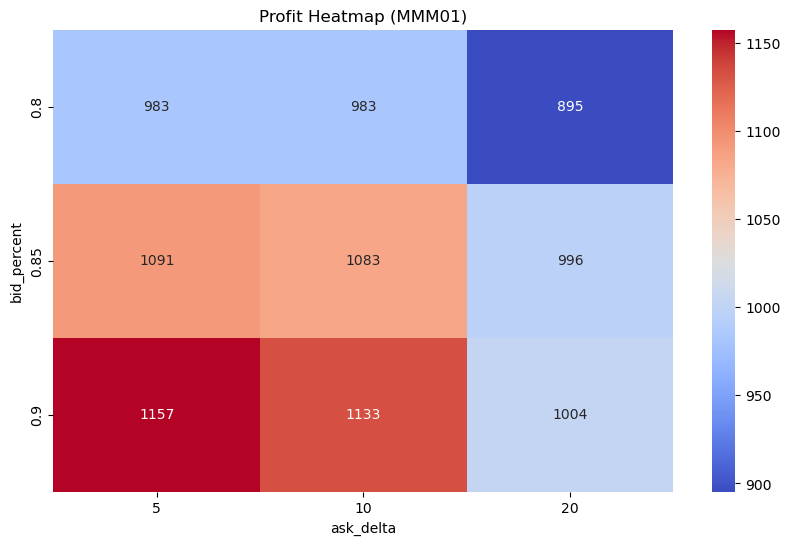

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_clean = df.groupby(["bid_percent", "ask_delta"], as_index=False)["profit"].mean()

pivot_df = df_clean.pivot(index="bid_percent", columns="ask_delta", values="profit")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Profit Heatmap (MMM01)")
plt.show()


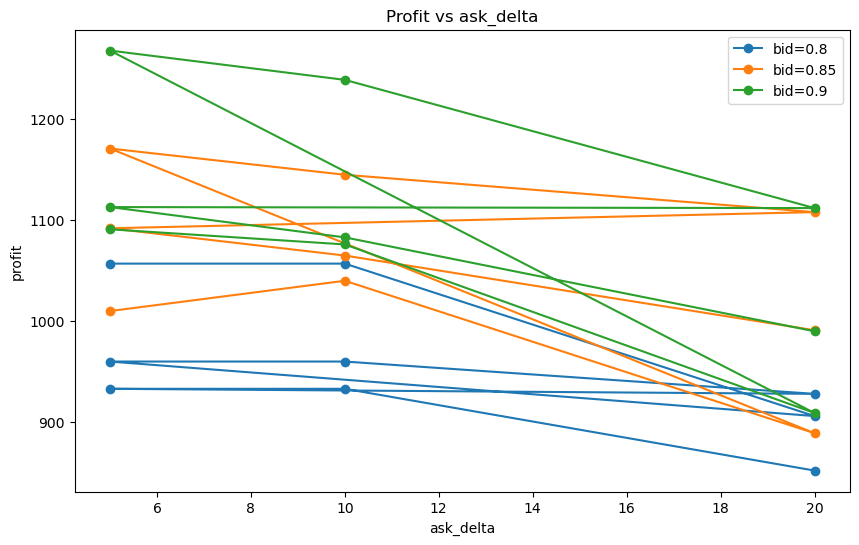

In [5]:
plt.figure(figsize=(10,6))

for bp in [0.8, 0.85, 0.9]:
    sub = df[df["bid_percent"] == bp]
    plt.plot(sub["ask_delta"], sub["profit"], marker="o", label=f"bid={bp}")

plt.legend()
plt.xlabel("ask_delta")
plt.ylabel("profit")
plt.title("Profit vs ask_delta")
plt.show()
